In [1]:
import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from textblob import TextBlob
from wordcloud import WordCloud
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# URLs of books to scrape from Project Gutenberg
urls = [
    'https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm', # Moby Dick
    'https://www.gutenberg.org/files/1342/1342-h/1342-h.htm', # Pride and Prejudice
    'https://www.gutenberg.org/files/98/98-h/98-h.htm' # A Tale of Two Cities
]

In [4]:
# Step 1: Scrape and parse the HTML content for each book
def scrape_book(url):
    response = requests.get(url)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, 'html.parser')
    text = soup.get_text()
    return text

books = [scrape_book(url) for url in urls]

In [5]:
# Step 2: Tokenize, clean, and process the text for each book
def process_text(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    words_no_stop = [word for word in tokens if word not in stop_words]
    return words_no_stop

In [6]:
processed_books = [process_text(book) for book in books]

In [7]:
# Step 3: Perform word frequency analysis for each book
def word_frequency(words):
    return Counter(words)

word_counts = [word_frequency(book) for book in processed_books]

In [8]:
# Step 4: Perform sentiment analysis using TextBlob
def sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

sentiments = [sentiment_analysis(book) for book in books]

In [9]:
# Step 5: Perform topic modeling using gensim
def topic_modeling(words):
    dictionary = corpora.Dictionary([words])
    corpus = [dictionary.doc2bow(words)]
    lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)
    return lda_model.print_topics()

topics = [topic_modeling(book) for book in processed_books]

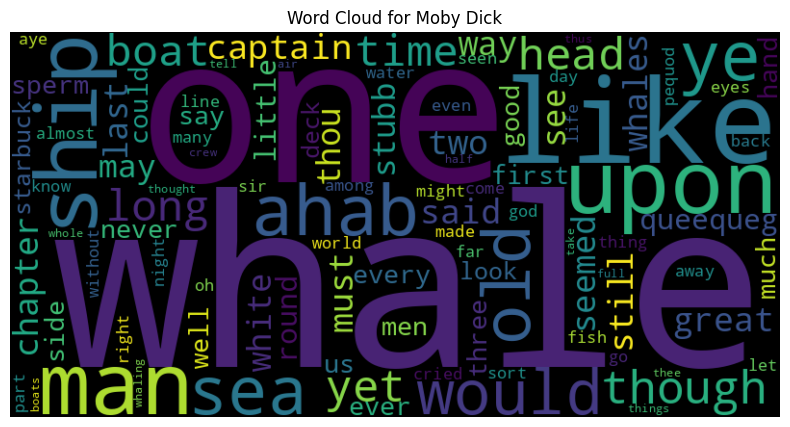

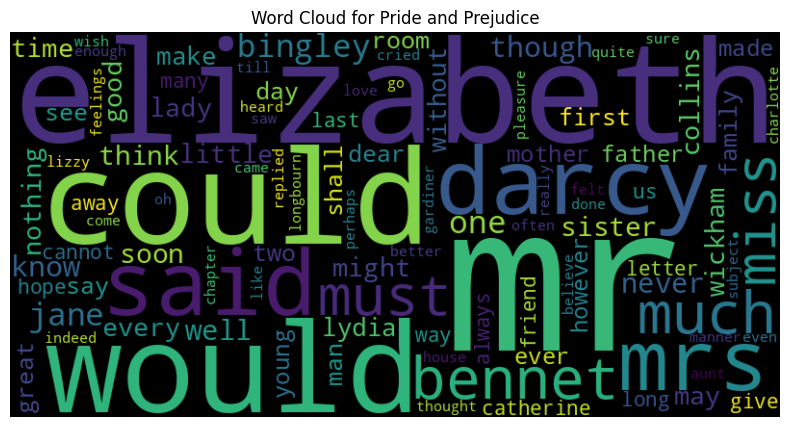

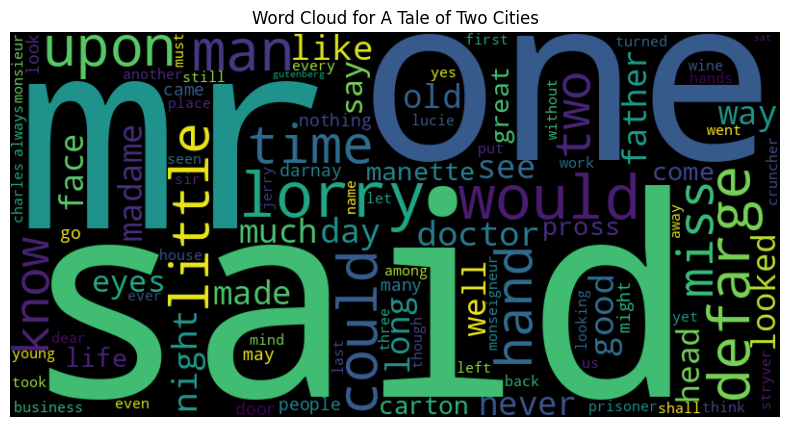

In [10]:
# Step 6: Visualize word frequencies with WordClouds
def generate_wordcloud(word_counts, book_title):
    wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {book_title}')
    plt.show()

for i, book_title in enumerate(["Moby Dick", "Pride and Prejudice", "A Tale of Two Cities"]):
    generate_wordcloud(word_counts[i], book_title)

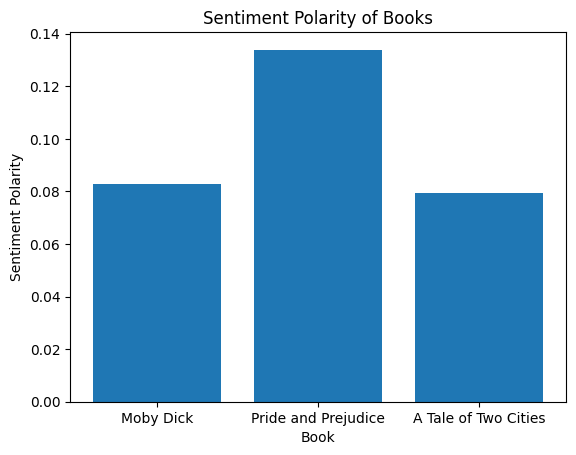

In [11]:
# Step 7: Plot Sentiment Analysis Results
plt.bar(["Moby Dick", "Pride and Prejudice", "A Tale of Two Cities"], sentiments)
plt.title("Sentiment Polarity of Books")
plt.xlabel("Book")
plt.ylabel("Sentiment Polarity")
plt.show()